In [ ]:
# !labelme2coco ./hold_smartphone --train_split_rate 0.85

In [1]:
import torch, detectron2

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

import cv2
import IPython

def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

/home/hkl/anaconda3/envs/detron/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "runs/labelme2coco/train.json", "hold_smartphone")
register_coco_instances("my_dataset_val", {}, "runs/labelme2coco/val.json", "hold_smartphone")

# register_coco_instances("my_dataset_train", {}, "datasets/hold_smartphone-1.json", "datasets/hold_smartphone")

In [3]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_1x.yaml"))

cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_1x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2  # This is the real "batch size" commonly known to deep learning people
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
# cfg.SOLVER.BASE_LR = 0.0005  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[08/02 10:06:35 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 2048) in the checkpoint but (2, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 2048) in the checkpoint but (4, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, we

[08/02 10:06:35 d2.engine.train_loop]: Starting training from iteration 0


/home/hkl/anaconda3/envs/detron/lib/python3.7/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[08/02 10:06:41 d2.utils.events]:  eta: 0:00:54  iter: 19  total_loss: 1.674  loss_cls: 0.7791  loss_box_reg: 0.656  loss_rpn_cls: 0.2116  loss_rpn_loc: 0.03945  time: 0.1905  data_time: 0.0105  lr: 1.6068e-05  max_mem: 2172M
[08/02 10:06:47 d2.utils.events]:  eta: 0:01:08  iter: 39  total_loss: 1.445  loss_cls: 0.6019  loss_box_reg: 0.6243  loss_rpn_cls: 0.2062  loss_rpn_loc: 0.01691  time: 0.2518  data_time: 0.0047  lr: 3.2718e-05  max_mem: 2172M
[08/02 10:06:53 d2.utils.events]:  eta: 0:01:10  iter: 59  total_loss: 1.372  loss_cls: 0.4394  loss_box_reg: 0.6486  loss_rpn_cls: 0.206  loss_rpn_loc: 0.02935  time: 0.2675  data_time: 0.0034  lr: 4.9367e-05  max_mem: 2172M
[08/02 10:06:59 d2.utils.events]:  eta: 0:01:04  iter: 79  total_loss: 1.204  loss_cls: 0.3549  loss_box_reg: 0.6114  loss_rpn_cls: 0.1736  loss_rpn_loc: 0.02016  time: 0.2763  data_time: 0.0041  lr: 6.6017e-05  max_mem: 2172M
[08/02 10:07:05 d2.utils.events]:  eta: 0:00:59  iter: 99  total_loss: 1.125  loss_cls: 0.2971

In [4]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[08/02 10:08:11 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                         | Shapes                                          |
|:------------------------------------------------|:--------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.res2.0.conv1.*                         | backbone.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}     | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.res2.0.conv2.*                         | backbone.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}     | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.res2.0.conv3.*                         | backbone.res2.0.conv3.{norm.bias,norm.running_mean,norm.running_var,norm.weig

In [6]:
from detectron2.data.datasets import load_coco_json

dataset_dicts = DatasetCatalog.get("my_dataset_val")
# dataset_dicts = DatasetCatalog.get("my_dataset_train")
print("Done loading {} samples.".format(len(dataset_dicts)))


WARNING [08/02 10:08:21 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[08/02 10:08:21 d2.data.datasets.coco]: Loaded 23 images in COCO format from runs/labelme2coco/val.json
Done loading 23 samples.


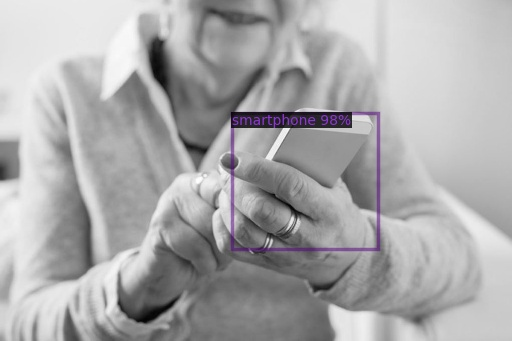

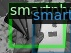

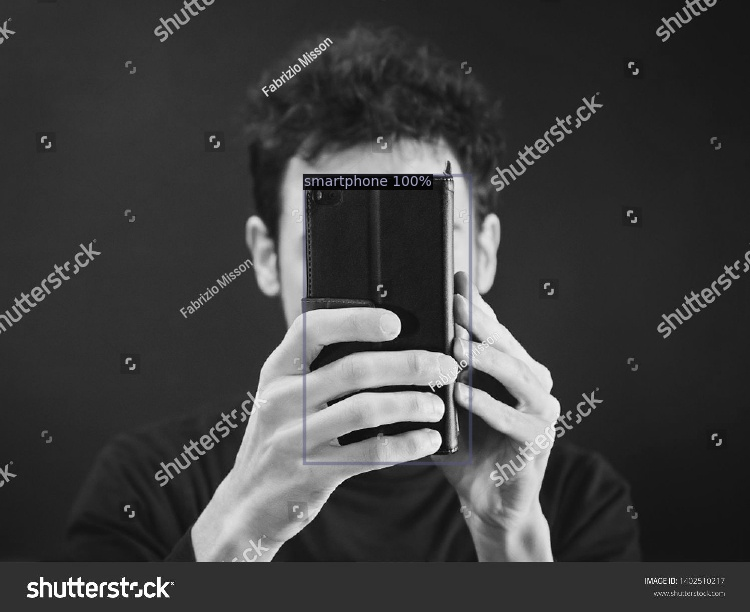

In [7]:
from detectron2.utils.visualizer import ColorMode

my_dataset_val_metadata = MetadataCatalog.get("my_dataset_val")
# my_dataset_val_metadata = MetadataCatalog.get("my_dataset_train")


for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=my_dataset_val_metadata, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    imshow(out.get_image()[:, :, ::-1])

In [8]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_val", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

WARNING [08/02 10:25:20 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[08/02 10:25:20 d2.data.datasets.coco]: Loaded 23 images in COCO format from runs/labelme2coco/val.json
[08/02 10:25:20 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
| smartphone | 23           |
|            |              |
[08/02 10:25:20 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/02 10:25:20 d2.data.common]: Serializing 23 elements to byte tensors and concatenating them all ...
[08/02 10:25:20 d2.data.common]: Serialized dataset takes 0.00 MiB
[08/02 10:25:20 d2.evaluation.evaluator]: Start inference on 23 batches
[08/02 10:25:22 d2.evaluation.evaluator]: Inference done 11/23. Dataloading: 0.0007 s/iter. Inference: 0.1162 s/iter. Eval: 0.0002 s/i